<a href="https://colab.research.google.com/github/KwinLook/ADEX-Project/blob/main/Project-Code/Normal_ANN_Model-%5BAdd%20out%20put%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# ----------------------------------------------

!unzip --qq dataset-training-3000-images.zip
!unzip --qq dataset-predict-750-images.zip

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.utils.data as data
import torchvision
from torchvision import datasets, transforms
from torch import nn,optim
from time import time

In [3]:
width = 150
size=(width,width)

tranform = transforms.Compose([transforms.Resize(size),
                              transforms.Grayscale(num_output_channels=1),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5),(0.5))])

In [4]:
trainset = torchvision.datasets.ImageFolder(root="train/", transform=tranform)
print(trainset)

Dataset ImageFolder
    Number of datapoints: 3000
    Root location: train/
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=None)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


In [5]:
validationset = torchvision.datasets.ImageFolder(root="validation/", transform=tranform)
print(validationset)

Dataset ImageFolder
    Number of datapoints: 1500
    Root location: validation/
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=None)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
print(trainloader)

In [7]:
validationloader = torch.utils.data.DataLoader(validationset, batch_size=4, shuffle=True)
print(validationloader)

In [8]:
images, labels = next(iter(trainloader))

In [9]:
print(images.shape)
print(labels.shape)
print(labels)

torch.Size([4, 1, 150, 150])
torch.Size([4])
tensor([0, 0, 0, 0])


In [10]:
# plt.imshow(images[2][0],cmap='gray')
# plt.show()
# print('Answer:',labels[2])

In [11]:
#Create ANN Model
input_size = width*width*1
hidden_sizes = [1890,1350,810,270,135,60]
output_size = 3

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]), nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]), nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]), nn.ReLU(),
                      nn.Linear(hidden_sizes[3], hidden_sizes[4]), nn.ReLU(),
                      nn.Linear(hidden_sizes[4], hidden_sizes[5]), nn.ReLU(),
                      nn.Linear(hidden_sizes[5], output_size), nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=22500, out_features=1890, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1890, out_features=1350, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1350, out_features=810, bias=True)
  (5): ReLU()
  (6): Linear(in_features=810, out_features=270, bias=True)
  (7): ReLU()
  (8): Linear(in_features=270, out_features=135, bias=True)
  (9): ReLU()
  (10): Linear(in_features=135, out_features=60, bias=True)
  (11): ReLU()
  (12): Linear(in_features=60, out_features=3, bias=True)
  (13): LogSoftmax(dim=1)
)


In [12]:
#Train Model
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.09)
time0 = time()
epochs = 100
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    x = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print('Epoch {} - Train loss {}'.format(e+1, running_loss/len(trainloader)))
print('\nTraining Time (in minutes) - {}'.format((time()-time0)/60))

Epoch 1 - Train loss 1.019703668753306
Epoch 2 - Train loss 0.9221441484292349
Epoch 3 - Train loss 0.8482820113499959
Epoch 4 - Train loss 0.7622207926909129
Epoch 5 - Train loss 0.7014349205493927
Epoch 6 - Train loss 0.6723555851777394
Epoch 7 - Train loss 0.5876376616160075
Epoch 8 - Train loss 0.4177634319812059
Epoch 9 - Train loss 0.35347272143512964
Epoch 10 - Train loss 0.3299397720520695
Epoch 11 - Train loss 0.3040080172556142
Epoch 12 - Train loss 0.28361392274871466
Epoch 13 - Train loss 0.2600558982379734
Epoch 14 - Train loss 0.24345058897944788
Epoch 15 - Train loss 0.209129151477168
Epoch 16 - Train loss 0.1872472640182823
Epoch 17 - Train loss 0.15809300244723756
Epoch 18 - Train loss 0.13667733711594096
Epoch 19 - Train loss 0.11406298721348866
Epoch 20 - Train loss 0.09661520393767084
Epoch 21 - Train loss 0.07928611932644465
Epoch 22 - Train loss 0.07046818739858766
Epoch 23 - Train loss 0.043717647658661006
Epoch 24 - Train loss 0.05699769182569192
Epoch 25 - Trai

In [13]:
images_validation,labels_validation=next(iter(validationloader))
print(images_validation.shape)
print(labels_validation)

torch.Size([4, 1, 150, 150])
tensor([0, 0, 0, 0])


tensor([[9.9998e-01, 1.5799e-05, 3.3321e-06]])


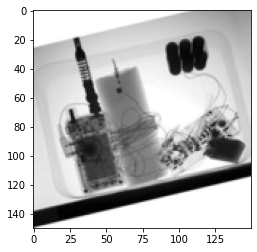

ANSWER: tensor(0)


In [14]:
x_validation = images_validation[1].view(1,width*width)

with torch.no_grad():
  y = model(x_validation)

print(torch.exp(y))

plt.imshow(images_validation[1][0], cmap='gray')
plt.show()
print('ANSWER:' ,labels[1])


In [15]:
true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0

for images_validation, labels_validation in validationloader:
  for i in range(len(labels_validation)):
    x = images_validation[i].view(1,150*150)

    with torch.no_grad():
        log_y = model(x)
    y = torch.exp(log_y)
    prob = list(y.numpy()[0])
    pred_output = prob.index(max(prob))

    answer = labels_validation.numpy()[i]
    if answer == pred_output and answer == 0:
          true_negatives += 1
    elif answer == pred_output and answer == 1:
          true_positives += 1
    elif answer != pred_output and answer == 0:
          false_positives += 1
    elif answer != pred_output and answer == 1:
          false_negatives += 1

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)

print('Number of Images validated:', true_positives + false_positives + false_negatives + true_negatives)
print('True Position:', true_positives)
print('True Negative:', true_negatives)
print('False Positives:', false_positives)
print('False Negative:', false_negatives)
print('-------------------------------------------------------------')
print('Model Accuracy:', (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Number of Images validated: 1500
True Position: 490
True Negative: 792
False Positives: 208
False Negative: 10
-------------------------------------------------------------
Model Accuracy: 0.8546666666666667
Precision: 0.7020057306590258
Recall: 0.98
F1 Score: 0.8180300500834724


**Prediction With Unseen Data**

In [16]:
predictset = torchvision.datasets.ImageFolder(root="predict-750-images/", transform=tranform)
print(predictset)

Dataset ImageFolder
    Number of datapoints: 750
    Root location: predict-750-images/
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=None)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


In [17]:
predictloader = torch.utils.data.DataLoader(predictset, batch_size=4, shuffle=True)
print(predictloader)

In [18]:
images_predict,labels_predict=next(iter(predictloader))
print(images_predict.shape)
print(labels_predict)

torch.Size([4, 1, 150, 150])
tensor([0, 0, 0, 0])


tensor([[0.9377, 0.0472, 0.0151]])


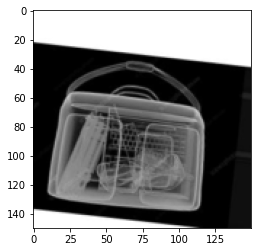

ANSWER: tensor(0)


In [19]:
x_predict = images_predict[1].view(1,width*width)

with torch.no_grad():
  y = model(x_predict)

print(torch.exp(y))

plt.imshow(images_predict[1][0], cmap='gray')
plt.show()
print('ANSWER:' ,labels[1])


In [20]:
true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0

for images_predict, labels_predict in predictloader:
  for i in range(len(labels_predict)):
    x = images_predict[i].view(1,150*150)

    with torch.no_grad():
        log_y = model(x)
    y = torch.exp(log_y)
    prob = list(y.numpy()[0])
    pred_output = prob.index(max(prob))

    answer = labels_predict.numpy()[i]
    if answer == pred_output and answer == 0:
          true_negatives += 1
    elif answer == pred_output and answer == 1:
          true_positives += 1
    elif answer != pred_output and answer == 0:
          false_positives += 1
    elif answer != pred_output and answer == 1:
          false_negatives += 1

precision = true_positives / (true_positives + false_positives)
if (true_positives + false_negatives) == 0:
    recall = 0
else:
    recall = true_positives / (true_positives + false_negatives)
if (precision + recall) == 0:
    f1 = 0
else:
    f1 = 2 * (precision * recall) / (precision + recall)

print('Number of Images Predict with Unseen Data:', true_positives + false_positives + false_negatives + true_negatives)
print('True Position:', true_positives)
print('True Negative:', true_negatives)
print('False Positives:', false_positives)
print('False Negative:', false_negatives)
print('-------------------------------------------------------------')
print('Model Accuracy:', (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Number of Images Predict with Unseen Data: 750
True Position: 0
True Negative: 235
False Positives: 515
False Negative: 0
-------------------------------------------------------------
Model Accuracy: 0.31333333333333335
Precision: 0.0
Recall: 0
F1 Score: 0


In [21]:
true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0

for images_validation, labels_validation in validationloader:
  for i in range(len(labels_validation)):
    x = images_validation[i].view(1,150*150)

    with torch.no_grad():
        log_y = model(x)
    y = torch.exp(log_y)
    prob = list(y.numpy()[0])
    pred_output = prob.index(max(prob))

    answer = labels_validation.numpy()[i]
    if answer == pred_output and answer == 0:
          true_negatives += 1
    elif answer == pred_output and answer == 1:
          true_positives += 1
    elif answer != pred_output and answer == 0:
          false_positives += 1
    elif answer != pred_output and answer == 1:
          false_negatives += 1

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)

print('Number of Images validated:', true_positives + false_positives + false_negatives + true_negatives)
print('True Position:', true_positives)
print('True Negative:', true_negatives)
print('False Positives:', false_positives)
print('False Negative:', false_negatives)
print('-------------------------------------------------------------')
print('Model Accuracy:', (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Number of Images validated: 1500
True Position: 490
True Negative: 792
False Positives: 208
False Negative: 10
-------------------------------------------------------------
Model Accuracy: 0.8546666666666667
Precision: 0.7020057306590258
Recall: 0.98
F1 Score: 0.8180300500834724
